# Тюнинг линейной регрессии и ошибки

### О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии

In [1]:
%pylab inline
import pandas as pd
from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3. Зачем так делать? Когда вы проверяете себя на данных на которых не обучались, вы можете быть уверены что не переобучились. Таким образом если качество на 70% датасета (оубчающей выборке) растёт, а на тестовой выборке падает, то модель начала запоминать датасет (переобучилась), вы что-то делаете не так.


In [2]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(4 балла)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$).

Спойлер - при большом гиперпараметре регуляризации все параметры стремятся к нулю. На графике это должно быть видно.

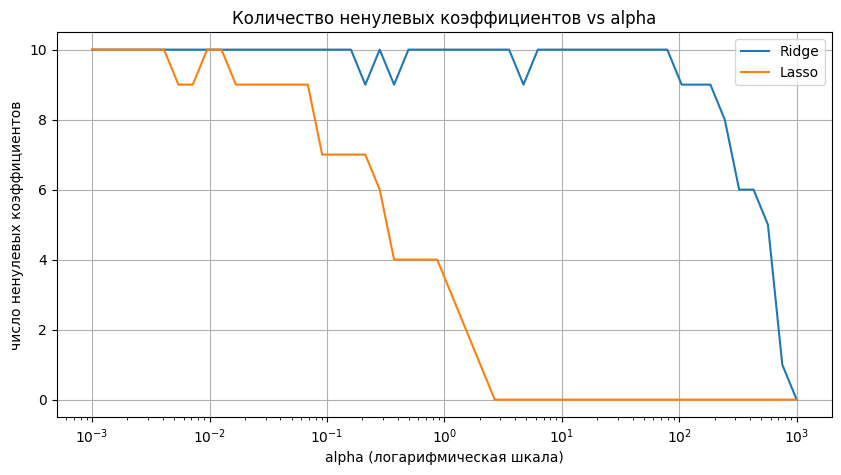

In [3]:
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
import numpy as np
delta = 9e-1
alphas = np.logspace(-3, 3, 50)
nonzero_counts_lasso = []
nonzero_counts_ridge = []
for alpha in alphas:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train, y_train)
    nonzero_counts_lasso.append(np.sum(np.abs(lasso.coef_) > delta))

    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    nonzero_counts_ridge.append(np.sum(np.abs(ridge.coef_) > delta))

plt.figure(figsize=(10,5))
plt.plot(alphas, nonzero_counts_ridge, label='Ridge')
plt.plot(alphas, nonzero_counts_lasso, label='Lasso')
plt.xscale('log')
plt.xlabel('alpha (логарифмическая шкала)')
plt.ylabel('число ненулевых коэффициентов')
plt.title('Количество ненулевых коэффициентов vs alpha')
plt.legend()
plt.grid(True)
plt.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [4]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [5]:
# code here
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R^2:  {r2:.4f}")

RMSE: 58.3043
MAE:  49.6028
R^2:  0.3599


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

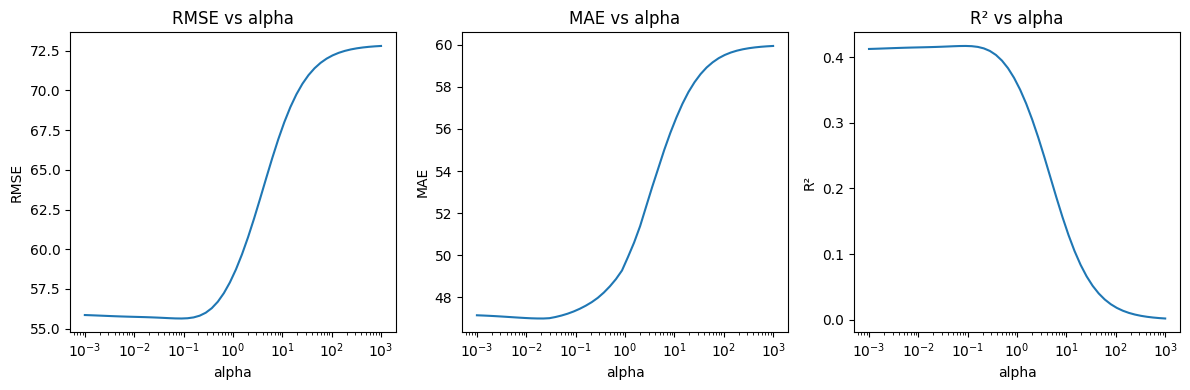

Best RMSE alpha: 0.09102981779915217 and RMSE: 55.6394
Best MAE alpha: 0.022229964825261943 and MAE: 47.0030
Best R2 alpha: 0.09102981779915217 and R2: 0.4171


In [6]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import numpy as np
alphas = np.logspace(-3, 3, 50)
rmse_list = []
mae_list = []
r2_list = []

for alpha in alphas:

    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)

    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_list.append(mean_absolute_error(y_test, y_pred))
    r2_list.append(r2_score(y_test, y_pred))

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.plot(alphas, rmse_list)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs alpha')

plt.subplot(1,3,2)
plt.plot(alphas, mae_list)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MAE')
plt.title('MAE vs alpha')

plt.subplot(1,3,3)
plt.plot(alphas, r2_list)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R²')
plt.title('R² vs alpha')

plt.tight_layout()
plt.show()

best_RMSE_alpha = alphas[np.argmin(rmse_list)]
best_MAE_alpha = alphas[np.argmin(mae_list)]
best_R2_alpha = alphas[np.argmax(r2_list)]

print(f"Best RMSE alpha: {best_RMSE_alpha} and RMSE: {np.min(rmse_list):.4f}")
print(f"Best MAE alpha: {best_MAE_alpha} and MAE: {np.min(mae_list):.4f}")
print(f"Best R2 alpha: {best_R2_alpha} and R2: {np.max(r2_list):.4f}")


__Задание 2.__ Поиск объектов-выбросов

**(4 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

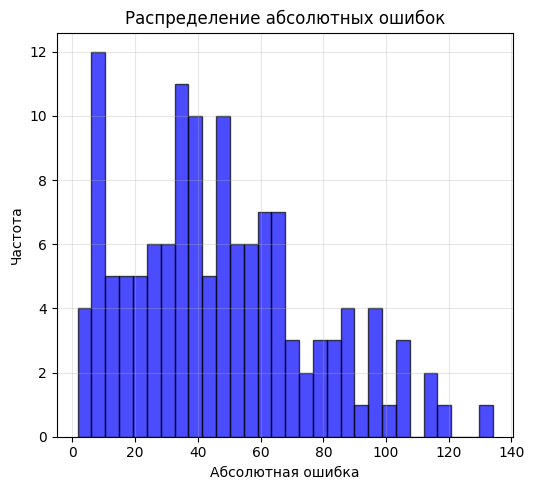

Статистика по ошибкам:
Средняя абсолютная ошибка: 47.34
Медианная абсолютная ошибка: 43.01
Максимальная абсолютная ошибка: 134.03
Минимальная абсолютная ошибка: 1.65

Порог для выбросов: 105.82
Количество выбросов: 5
Доля выбросов: 3.76%
Выброс 1:
  Истинное значение: 332.00
  Предсказанное значение: 212.33
  Абсолютная ошибка: 119.67
Выброс 2:
  Истинное значение: 201.00
  Предсказанное значение: 94.28
  Абсолютная ошибка: 106.72
Выброс 3:
  Истинное значение: 84.00
  Предсказанное значение: 200.07
  Абсолютная ошибка: 116.07
Выброс 4:
  Истинное значение: 311.00
  Предсказанное значение: 176.97
  Абсолютная ошибка: 134.03
Выброс 5:
  Истинное значение: 25.00
  Предсказанное значение: 138.37
  Абсолютная ошибка: 113.37


In [19]:
best_ridge = Ridge(alpha=best_RMSE_alpha)
best_ridge.fit(X_train, y_train)
y_pred = best_ridge.predict(X_test)


absolute_errors = np.abs(y_test - y_pred)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(absolute_errors, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Абсолютная ошибка')
plt.ylabel('Частота')
plt.title('Распределение абсолютных ошибок')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Статистика по ошибкам:")
print(f"Средняя абсолютная ошибка: {np.mean(absolute_errors):.2f}")
print(f"Медианная абсолютная ошибка: {np.median(absolute_errors):.2f}")
print(f"Максимальная абсолютная ошибка: {np.max(absolute_errors):.2f}")
print(f"Минимальная абсолютная ошибка: {np.min(absolute_errors):.2f}")

threshold = np.mean(absolute_errors) + 2 * np.std(absolute_errors)
outliers = absolute_errors > threshold

print(f"\nПорог для выбросов: {threshold:.2f}")
print(f"Количество выбросов: {np.sum(outliers)}")
print(f"Доля выбросов: {np.sum(outliers) / len(y_test):.2%}")

outlier_ind = np.where(outliers)[0]

for i, idx in enumerate(outlier_ind):
    print(f"Выброс {i+1}:")
    print(f"  Истинное значение: {y_test[idx]:.2f}")
    print(f"  Предсказанное значение: {y_pred[idx]:.2f}")
    print(f"  Абсолютная ошибка: {absolute_errors[idx]:.2f}")



Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [17]:

y_pred_train = best_ridge.predict(X_train)
absolute_errors_train = np.abs(y_train - y_pred_train)
threshold_train = np.mean(absolute_errors_train) +  2.5 * np.std(absolute_errors_train)
outliers_train = absolute_errors_train > threshold_train

print(f"Выбросы в обучающей выборке: {np.sum(outliers_train)}")
print(f"Доля выбросов в обучающей выборке: {np.sum(outliers_train) / len(y_train):.2%}")

X_train_clean = X_train[~outliers_train]
y_train_clean = y_train[~outliers_train]

print(f"Удалено объектов: {np.sum(outliers_train)}")

ridge_clean = Ridge(alpha=best_RMSE_alpha)
ridge_clean.fit(X_train_clean, y_train_clean)
y_pred_clean = ridge_clean.predict(X_test)

rmse_original = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_clean = np.sqrt(mean_squared_error(y_test, y_pred_clean))

mae_original = mean_absolute_error(y_test, y_pred)
mae_clean = mean_absolute_error(y_test, y_pred_clean)

r2_original = r2_score(y_test, y_pred)
r2_clean = r2_score(y_test, y_pred_clean)

print("СРАВНЕНИЕ КАЧЕСТВА МОДЕЛЕЙ:")
print(f"{'Метрика':<10} {'Оригинал':<12} {'Без выбросов':<14} {'Изменение':<12}")
print(f"{'RMSE':<10} {rmse_original:<12.4f} {rmse_clean:<14.4f} {rmse_clean - rmse_original:>+10.4f}")
print(f"{'MAE':<10} {mae_original:<12.4f} {mae_clean:<14.4f} {mae_clean - mae_original:>+10.4f}")
print(f"{'R²':<10} {r2_original:<12.4f} {r2_clean:<14.4f} {r2_clean - r2_original:>+10.4f}")


Выбросы в обучающей выборке: 6
Доля выбросов в обучающей выборке: 1.94%
Удалено объектов: 6
СРАВНЕНИЕ КАЧЕСТВА МОДЕЛЕЙ:
Метрика    Оригинал     Без выбросов   Изменение   
RMSE       55.6394      56.0862           +0.4468
MAE        47.3358      47.5234           +0.1876
R²         0.4171       0.4077            -0.0094


__Задание 3.__ Отчёт

**(2 балла)**

# code here
Метрики RMSE, MAE, $R^2$ позволяют оценить качество модели и влияние выбросов.

Регуляризация Ridge помогает уменьшить переобучение и стабилизировать модель.

Удаление сильных выбросов улучшает предсказательную способность модели.